In [212]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import copy

import scipy.stats as stats
from scipy.interpolate import interp1d
import math
import sys

sys.path.append("./markdown.py")
import markdown as md

from matplotlib import style
from matplotlib.pyplot import figure
style.use('bmh')
plt_height = 7
plt_length = 10

md_head = ['I[A]', 'U[V]', 'Time', 'R[Ω]']
md_fields = [0, 1, 2, 3]
md_align = [('>', '>'), ('>', '>'), ('>', '>'), ('>', '>')]

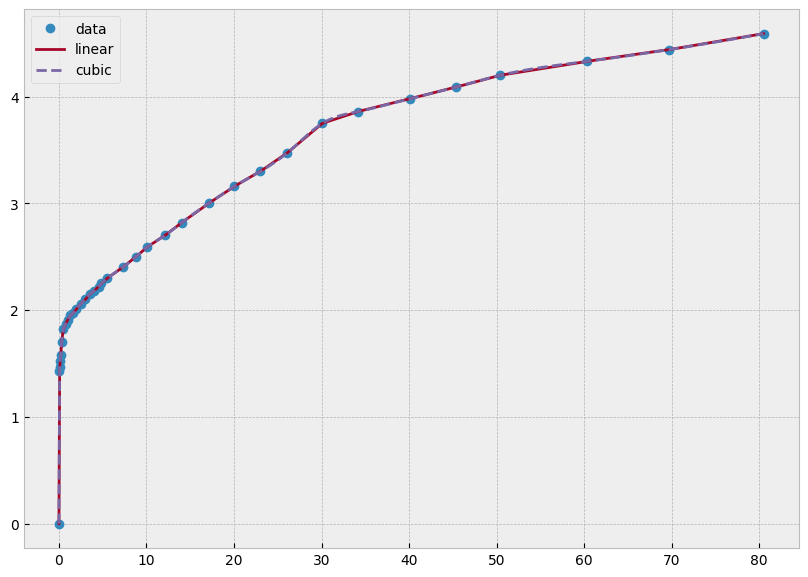

In [210]:
I = [0.05, 0.10, 0.15, 0.20, 0.30, 0.50, 0.75, 1.01, 1.30, 1.60, 2.00, 2.50, 3.02, 3.53, 4.00, 4.54, 4.85, 5.54, 7.28, 8.80, 10.07, 12.12, 14.02, 17.10, 20.05, 23.01, 26.04, 30.10, 34.16, 40.1, 45.4, 50.4, 60.3, 69.7, 80.5]
U = [1.43, 1.47, 1.52, 1.58, 1.70, 1.82, 1.87, 1.91, 1.95, 1.97, 2.01, 2.06, 2.10, 2.15, 2.18, 2.22, 2.25, 2.30, 2.40, 2.50, 2.59, 2.70, 2.82, 3.00, 3.16, 3.30, 3.47, 3.75, 3.86, 3.98, 4.09, 4.20, 4.33, 4.44, 4.59]

I.insert(0,0)
U.insert(0,0)

from scipy.interpolate import interp1d

f = interp1d(I, U)
f2 = interp1d(I, U, kind='cubic')

x = np.linspace(0, 80.5, 1000, endpoint=True)
figure(1, figsize=(plt_length, plt_height))
plt.plot(I, U, 'o', x, f(x), '-', x, f2(x), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

In [181]:
data = {
2: {
"I": [4.05, 5.57, 8.08, 11.19, 14.83, 16.70, 20.46, 23.52, 28.73, 33.76, 39.47, 47.50, 54.5, 67.3, 82.90],
"U": [3.82,3.92,4.12,4.30,4.54, 4.62, 4.97, 5.15,5.66, 5.87, 6.18, 6.58, 6.93, 7.53, 8.44],
"t": ["10:10", "08:12", "05:00" , "03:32", "02:30", "02:13", "01:48", "01:34", "01:17", "01:06", "00:56", "00:46", "00:42", "00:33", "00:27"]
}, 5: {
"I": [4.18, 5.07, 6.62, 8.40, 10.15, 12.47, 16.13, 19.15, 22.14, 25.09, 29.09, 34.68, 39.83, 45.80, 52.90, 61.80, 71.70, 82.20],
"U": [3.70, 3.75, 3.81, 3.87, 3.92, 3.99, 4.10, 4.16, 4.24, 4.31, 4.39, 4.52, 4.63, 4.76, 4.93, 5.09, 5.30, 5.51],
"t": ["13:42", "09:35", "06:22", "04:52", "04:00", "03:09", "02:22", "01:59", "01:44", "01:31", "01:17", "01:05", "00:56", "00:48", "00:41", "00:36", "00:30", "00:26"]
}, 10: {
"I": [4.35, 5.36, 6.63, 7.99, 10.38, 12.09, 14.02, 17.00, 20.79, 25.60, 30.30, 36.09, 41.60, 50.50, 61.7, 73.5],
"U": [3.47, 3.59, 3.67, 3.74, 3.81, 3.85, 3.91, 3.97, 4.06, 4.15, 4.23, 4.33, 4.42, 4.57, 4.74, 4.90],
"t": ["15:54", "09:59", "07:26", "05:48", "04:15", "03:32", "03:02", "02:25", "01:57", "01:34", "01:17", "01:04", "00:54", "00:44", "00:36", "00:28"]
}, 20: {
"I": [4.71, 5.46, 6.55, 7.85, 10.01, 12.07, 14.03, 17.13, 20.08, 23.15, 26.19, 30.09, 34.11, 39.85, 45.2, 50.3, 60.2, 69.9, 80.5],
"U": [2.99, 3.23, 3.44, 3.59, 3.69, 3.77, 3.82, 3.89, 3.95, 4.01, 4.06, 4.11, 4.18, 4.26,  4.34, 4.415, 4.55, 4.69, 4.83 ],
"t": ["17:28", "14:12", "11:07", "08:19", "05:58", "04:27", "03:36", "02:54", "02:18", "01:56", "01:41", "01:25", "01:12", "01:02", "00:53", "00:46", "00:38", "00:33", "00:28"]
}, 50: {
"I": [4.75, 5.45, 8.05, 9.95, 11.98, 14.00, 16.99, 20.02, 23.18, 25.99, 30.19, 34.07, 40.1, 45.2, 50.0, 60.3, 70.0, 82.1],
"U": [2.32, 2.53, 2.82, 3.00, 3.14, 3.35, 3.605, 3.74, 3.82, 3.89, 3.96, 4.04, 4.13, 4.20, 4.28, 4.42 , 4.54, 4.70],
"t": ["20:50", "17:20", "10:49", "07:51", "06:17", "05:10", "04:13", "03:15", "02:34", "02:11", "01:45", "01:30", "01:11", "01:03", "00:53", "00:42", "00:35", "00:28"]
}, 100: {
"I": [4.85, 5.54, 7.28, 8.80, 10.07, 12.12, 14.02, 17.10, 20.05, 23.01, 26.04, 30.10, 34.16, 40.1, 45.4, 50.4, 60.3, 69.7, 80.5],
"U": [2.25, 2.30, 2.40, 2.50, 2.59, 2.70, 2.82, 3.00, 3.16, 3.30, 3.47, 3.75, 3.86, 3.98, 4.09, 4.20, 4.33, 4.44, 4.59],
"t": ["14:30", "11:54", "09:06", "07:28", "06:21", "05:21", "04:35", "03:47", "03:12", "02:47", "02:28", "02:05", "01:48", "01:26", "01:15", "01:00", "00:46", "00:38", "00:31"]
}}

In [216]:
dataX = [2, 5, 10, 20, 50, 100] 
dataY = { 50: [], 100: [], 150: [], 200: [], 250: [], 300: [], 350: [] }

for key in data:
    tlen = len(data[key]["t"])
    data[key]["sec"] = np.zeros(tlen)

    for i in range(tlen):
        data[key]["sec"][i] = sum([a * b for a,b in zip([60,1], map(int,data[key]["t"][i].split(':')))])

    data[key]["P"] = [a * b for a, b in zip(data[key]["U"], data[key]["I"])]
    f = interp1d(data[key]["P"], data[key]["sec"], kind='cubic')
    data[key]["P2"] = np.linspace(50, 350, 7, endpoint=True)
    data[key]["sec2"] = f(data[key]["P2"])
    print(key)
    print(data[key]["sec2"])

    i = 0
    for keyY in dataY:
        dataY[keyY].append(data[key]["sec2"][i])
        i += 1

2
[205.74411888 115.63488471  86.54492211  71.8696731   60.39479884
  52.44909462  46.54473038  43.3808586 ]
5
[187.9955826  104.94420438  72.92715843  57.76169807  47.32730587
  40.5787127   36.61776207  32.76070165]
10
[197.47278367 107.35582574  72.78393988  55.71989194  45.48655017
  39.37226324  34.3251793   29.29985027]
20
[234.65116656 115.96898696  76.05655909  59.04429138  46.14380486
  39.10347771  34.74493056  31.22928058]
50
[294.59043784 145.15523997  91.3984083   66.34770386  50.40152639
  42.28841569  36.45363214  31.02068315]
100
[231.13954286 145.19330376 104.55578084  78.00342633  55.51109326
  45.47123328  38.36419271  32.62520012]


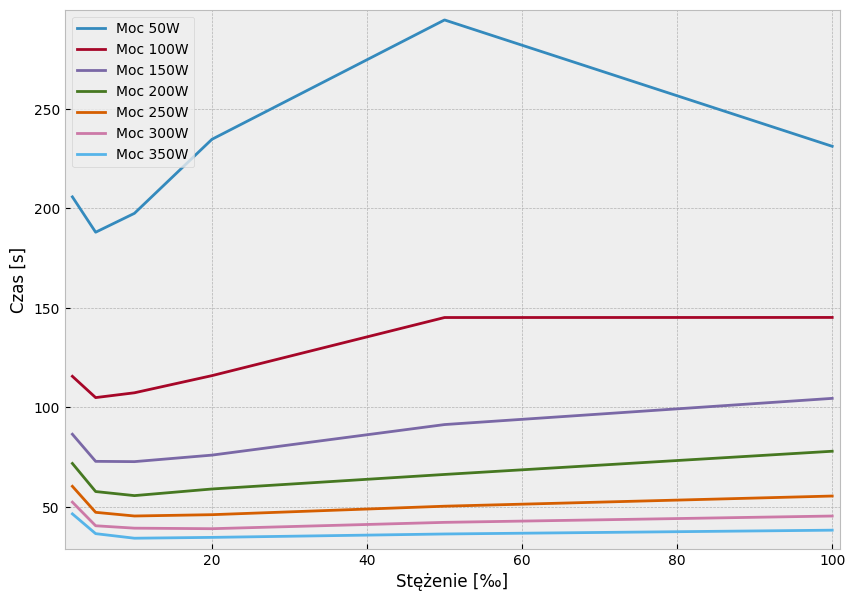

In [213]:
legend = [""] * len(dataY)
i = 0
for key in dataY:
    legend[i] = "Moc " + str(key) + "W"
    i += 1


figure(1, figsize=(plt_length, plt_height))

for key in dataY:
    plt.plot(dataX, dataY[key])

plt.xlabel("Stężenie [‰]")
plt.ylabel("Czas [s]")
plt.legend(legend)
plt.margins(0.01, 0.02)

plt.savefig("./png/eclz-static-const-power.png", bbox_inches = 'tight')
plt.savefig("./pdf/eclz-static-const-power.pdf", bbox_inches = 'tight')
plt.show()